# Creating checkboard pattern in different metrics

In [16]:
import os
import sys
import numpy as np
import scipy.ndimage

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Various size parameters for plotting
axistitlesize = 25
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

In [3]:
out = './output/'

In [4]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

## Checkboard creation

In [47]:
def create_domain(xy, N):
    """
    Create coordinate system for an arbitrary complex domain,
    """
    X = np.linspace(-xy, xy, N)
    Y = np.linspace(-xy, xy, N)
    X, Y = np.meshgrid(X, Y)
    
    return X + 1j*Y[::-1]

def normalize(arr):
    """
    Normalize data based on their min/max values.
    """
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def corr_singular(z):
    """
    Handle singular expressions
    """
    r = np.finfo(np.float64).eps
    return np.nan_to_num(z, nan=r, neginf=r, posinf=r)

def calc_params(zz):
    """
    Calculate the plotted parameters used to visualize the "4D depth"
    of an arbitrary complex function in 2D.
    """
    # Length of z
    r = corr_singular(np.abs(zz))
    # Argument of z
    arg = normalize(np.angle(zz) % (2 * np.pi))
    # Create logarithmic mask of z
    mask = normalize(np.log2(r) % 1)
    
    return arg, mask

def create_grid(zz):
    
    # Create base grid
    x = zz.real
    y = zz.imag
    grid = cb(x, y) > 0
    
    # Find edges
    img_sobel = scipy.ndimage.filters.sobel(grid)
    bn_img = np.zeros([img_sobel.shape[0],img_sobel.shape[1]])
    sbl_max = np.amax(abs(img_sobel))
    bn_img = np.abs(img_sobel) >= (sbl_max/2.0)
    
    return grid, bn_img

## Define checkboard function and other functions

In [33]:
cb = lambda x, y : (y%1 - 1/2) * (x%1 - 1/2)

In [34]:
fs = {
    # Basic functions
    # Parameters:
    # [xy, f]
    'f_p2' : [1.5, (lambda z : z**2)],
    'f_p3' : [1.5, (lambda z : z**3)],
    'f_p5m1' : [1.5, (lambda z : z**5 - 1)],
    'f_log' : [3, (lambda z : np.log(z))],
    'f_sin' : [3, (lambda z : np.sin(z))],
    'f_sinz' : [1.1, (lambda z : np.sin(1/z))],

    # Functions that look interesting
    'f_nice_1' : [2, (lambda z : (z**2 - 1j) / (2*z**2 + 2j))],
    'f_nice_2' : [3, (lambda z : (z - 2)**2 * (z + 1 - 2j) * (z + 2 - 2j) / z**3)],
    'f_nice_3' : [3, (lambda z : ((z**2 - 1) * (z - 2 - 1j)**2) / (z**2 + 2 + 2j))],
    
    # From AFG
    'f_tiles' : [10, (lambda x, y : cb(x,y) * cb(np.sqrt(2)/2 * (x+y), np.sqrt(2)/2 * (y-x)))],
}

### Calculate function on an arbitrary domain

In [48]:
# Choose a function
f = fs['f_nice_3']

# Create domain for plot
z = create_domain(xy=f[0], N=2000)
# Calculate function values
zz = f[1](z)
# Correct singularities (if exist)
zz = corr_singular(zz)

In [49]:
arg, mask = calc_params(zz)
grid, bn_img = create_grid(zz)

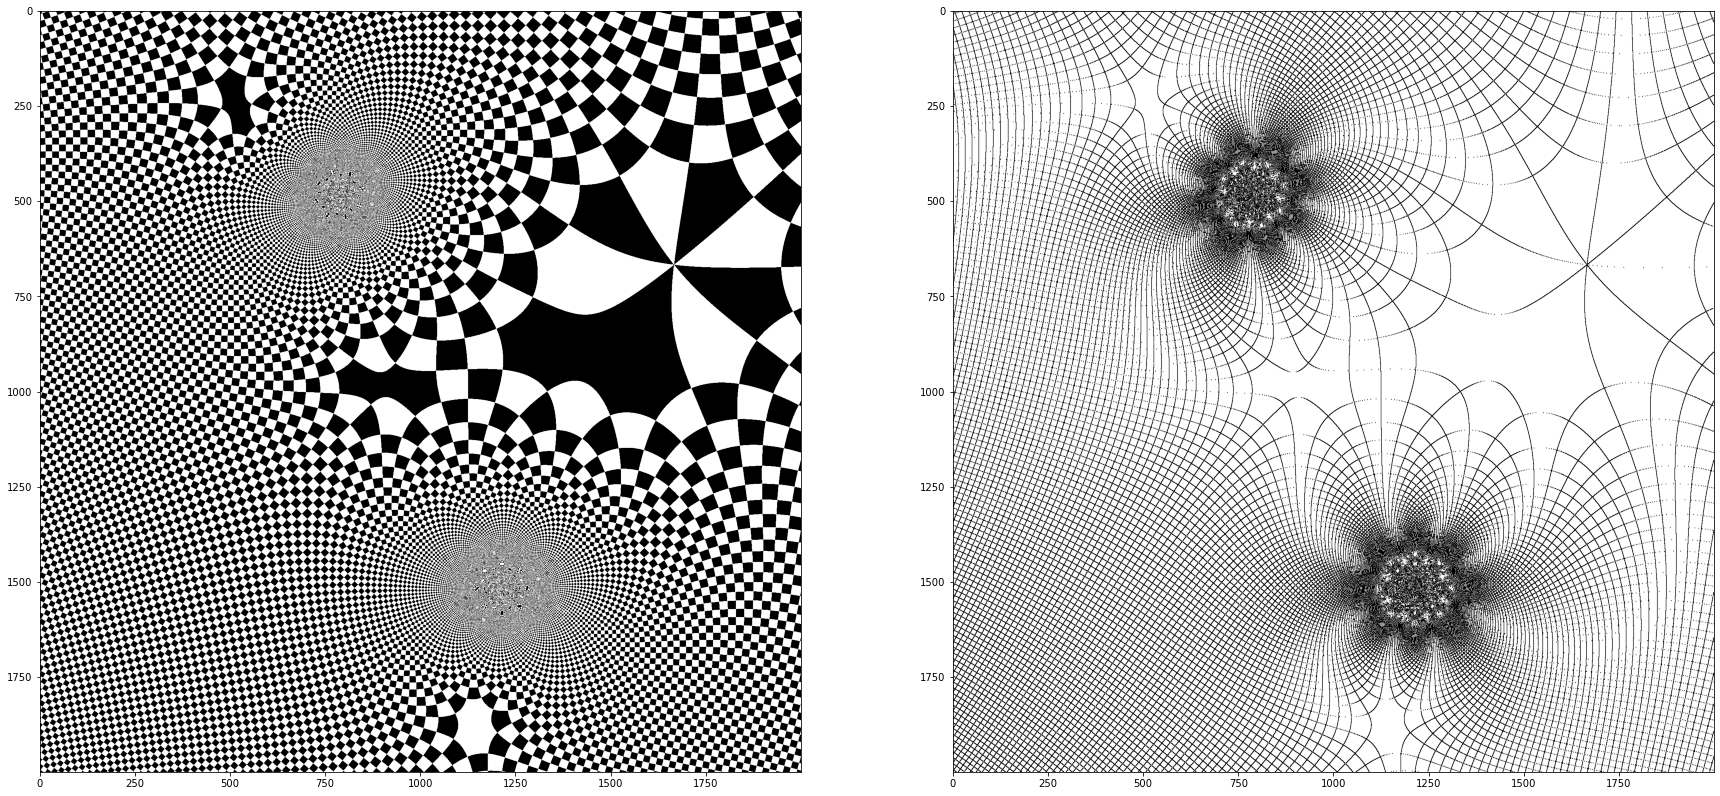

In [50]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*15, nrows*15))

axes[0].imshow(grid, cmap='Greys_r')
axes[1].imshow(bn_img, cmap='Greys')

plt.show()

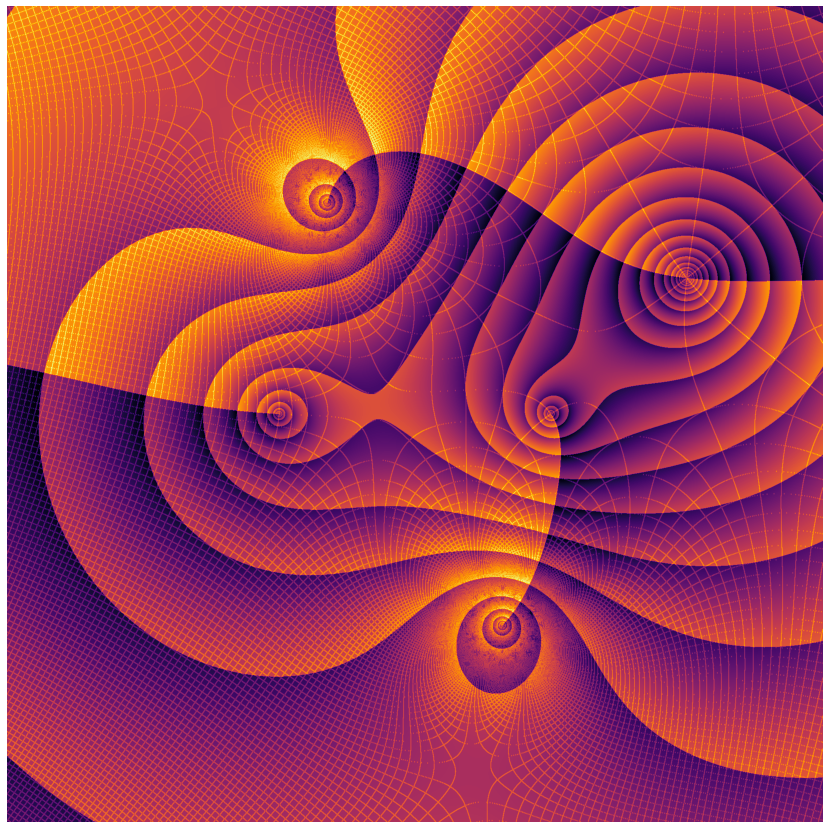

In [53]:
fig, axes = plt.subplots(figsize=(15,15))
axes.set_aspect('equal')
axes.axis('off')

im = axes.imshow(arg + mask + bn_img*0.5,
                 cmap=cmaps[2])
im.set_extent([-f[0], f[0], -f[0], f[0]])

plt.show()